## Lab 4:   An Object-Oriented Data Reduction Pipeline

In this lab, we will use a familiar imaging dataset to write an object-oriented data reduction pipeline.

In [1]:
import numpy as np
import os

import matplotlib.pyplot as plt
from astropy.io import fits

%matplotlib inline

### Import your own scripts

Import your scripts from Lab 3. Feel free to modify the names below


In [2]:
from Utils import load_file, implot

### Build a data reduction pipeline using OOP

On Canvas, we have provide data that should seem familiar.  We have provided raw images (`sci_raw*`) and calibration frames `dark` and `flat`.   The calibration frames have been pre-processed and can be applied directly to the science data.   

The science data are images from the QUEST telescope.   Here we will write a pipeline to reduce the images (overscan subtract, dark subtract, trim, flat field and display images).

We will write an object-oriented pipeline to reduce the science frames.

1.  Create a Class called Reduce_Me().
2.  Add as attributes filenames for the dark and flat field files.
3.  `overscan_subtract`:Write a method to subtract the overscan region from the science data
4.  `dark_subtract`:    Write a method to subtract the dark frame from the science data
5.  `trim_data`:        Trim the data to match the flat field
6.  `flat_field`:       Write a method to apply the flat field to the science data
7.  `display_data`:     Write a method to display the science data, transpose the data so the long axis is displayed horizontal
8.  Add a final method called `reduce` that performs all of the above steps.

Once you have created the Class above, reduce the 3 science images in one line of python code each.

In [14]:
#  Your Class here

class Reduce_Me_Prototype():
    '''
    This is a prototype, which will imshow each image at each step. The class below is the finalized version.
    '''

    def __init__(self, science, dark, flat):
        header_science, data_science = load_file(science)
        self.science = data_science
        header_dark, data_dark = load_file(dark)
        self.dark = data_dark
        header_flat, data_flat = load_file(flat)
        self.flat = data_flat
        fig = plt.figure(figsize = (20, 13))
        plt.imshow(self.science.T, vmin = np.percentile(self.science, 10), vmax = np.percentile(self.science, 90))
        print('__init__', np.median(self.science))
    
    def overscan_subtract(self):
        overscan = np.median(self.science[:,600:], axis = 1)
        self.science = self.science - overscan[:, np.newaxis]
        fig = plt.figure(figsize = (20, 13))
        plt.imshow(self.science.T, vmin = np.percentile(self.science, 10), vmax = np.percentile(self.science, 90))
        print('overscan_subtract',np.median(self.science))

    def dark_subtract(self):
        dark_subtracted = self.science - self.dark
        fig = plt.figure(figsize = (20, 13))
        plt.imshow(self.science.T, vmin = np.percentile(self.science, 10), vmax = np.percentile(self.science, 90))
        print('dark_subtract', np.median(dark_subtracted))
        
    def trim_data(self):
        self.science = self.science[:,:600]
        fig = plt.figure(figsize = (20, 13))
        plt.imshow(self.science.T, vmin = np.percentile(self.science, 10), vmax = np.percentile(self.science, 90))
        print('trim data: ',np.median(self.science))
        
    def flat_field(self):
        self.science = self.science[:,:600]/self.flat
        fig = plt.figure(figsize = (20, 13))
        plt.imshow(self.science.T, vmin = np.percentile(self.science, 10), vmax = np.percentile(self.science, 90))
        print('flat field: ',np.median(self.science))
        
    def display_data(self):
        fig = plt.figure(figsize = (20, 13))
        plt.imshow(self.science.T, vmin = np.percentile(self.science, 10), vmax = np.percentile(self.science, 90))
        print('display data: ',np.median(self.science))
        
    def reduce(self):
        self.overscan_subtract()
        self.dark_subtract()
        self.trim_data()
        self.flat_field()
        self.display_data()

In [15]:
class Reduce_Me():
    '''
    This class reduces raw science .fits files into fully reduced science images. Pre-reduced flat and dark
    frames are required. The class will subtract the overscan region, darks, trim the overscan, normalize the
    science frames and display the final image. The function .reduce() automates the process into one line.
    '''

    def __init__(self, science, dark, flat):
        header_science, data_science = load_file(science)
        self.science = data_science
        header_dark, data_dark = load_file(dark)
        self.dark = data_dark
        header_flat, data_flat = load_file(flat)
        self.flat = data_flat
        print('__init__', np.median(self.science))
    
    def overscan_subtract(self):
        overscan = np.median(self.science[:,600:], axis = 1)
        self.science = self.science - overscan[:, np.newaxis]
        print('overscan_subtract',np.median(self.science))

    def dark_subtract(self):
        dark_subtracted = self.science - self.dark
        print('dark_subtract', np.median(dark_subtracted))
        
    def trim_data(self):
        self.science = self.science[:,:600]
        print('trim data: ',np.median(self.science))
        
    def flat_field(self):
        self.science = self.science[:,:600]/self.flat
        print('flat field: ',np.median(self.science))
        
    def display_data(self):
        fig = plt.figure(figsize = (20, 13))
        
        mu = np.mean(self.science)
        sigma = np.std(self.science)
        scale = .2
        alpha = mu - scale*sigma
        beta = mu + scale*sigma
        
        plt.imshow(self.science.T, vmin = alpha, vmax = beta, cmap = 'gray_r', origin = 'lower')
        print('display data: ',np.median(self.science))
        
    def reduce(self):
        self.overscan_subtract()
        self.dark_subtract()
        self.trim_data()
        self.flat_field()
        self.display_data()

__init__ 1818.0
overscan_subtract 933.0
dark_subtract 930.5
trim data:  934.0
flat field:  940.9154563465117
display data:  940.9154563465117


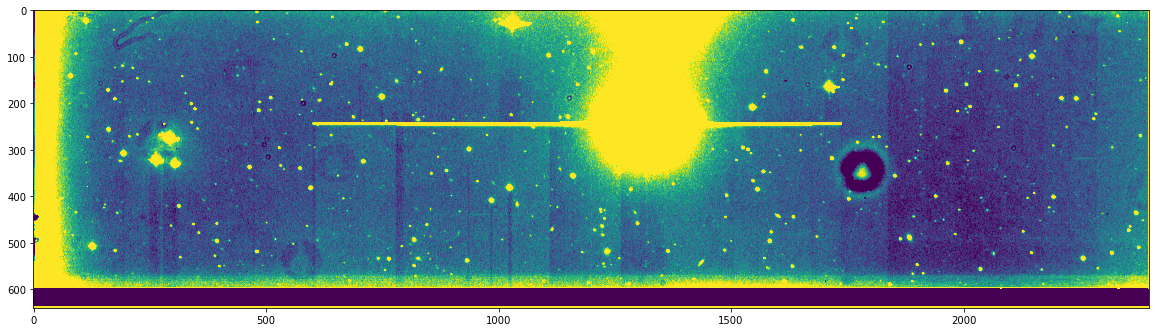

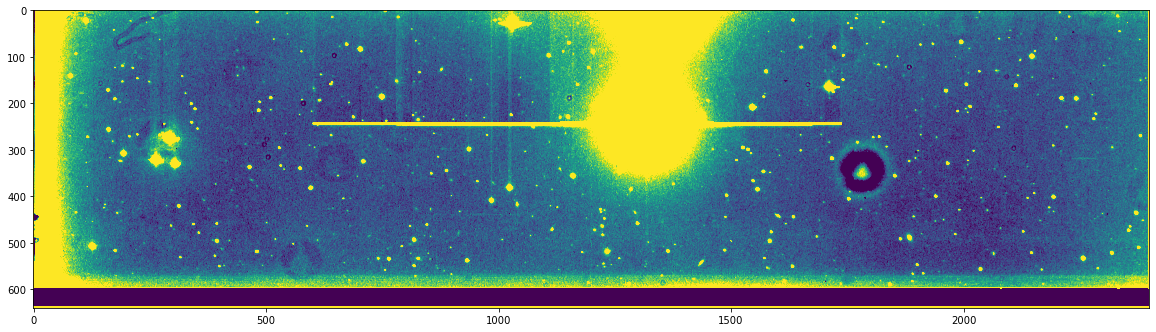

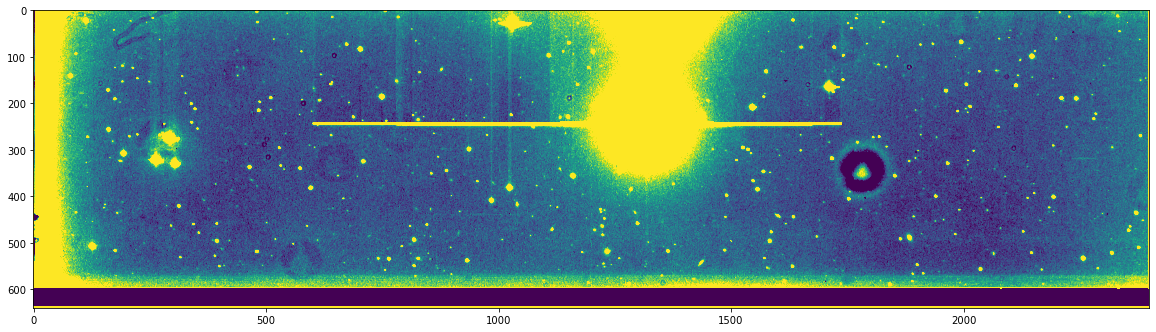

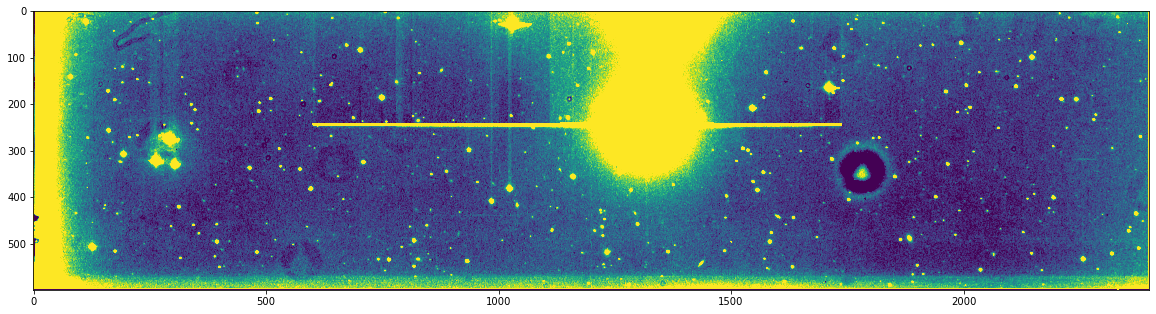

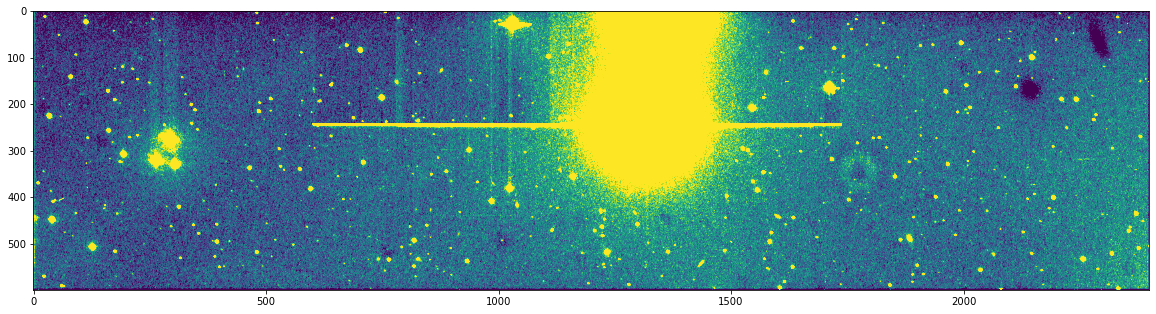

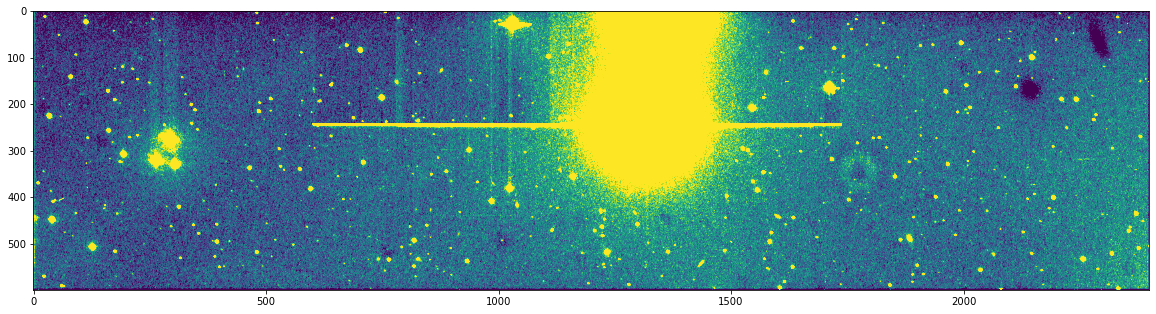

In [16]:
Reduce_Me_Prototype('raw_sci1.fits', 'dark.fits', 'flatfield.fits').reduce()

__init__ 1818.0
overscan_subtract 933.0
dark_subtract 930.5
trim data:  934.0
flat field:  940.9154563465117
display data:  940.9154563465117


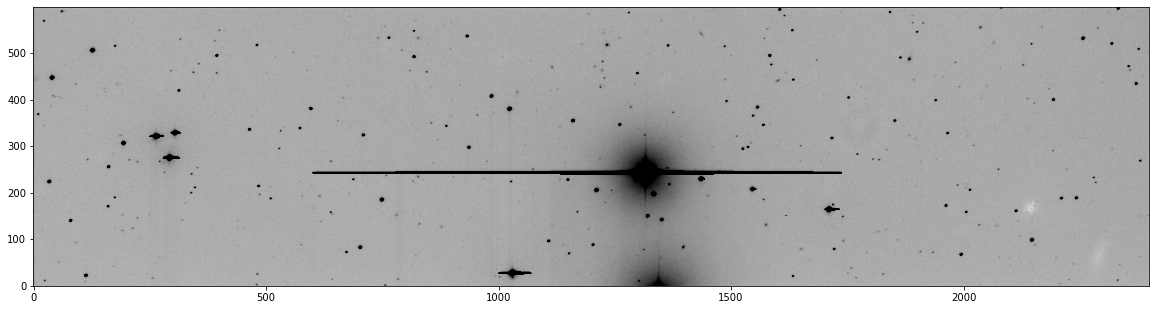

In [17]:
Reduce_Me('raw_sci1.fits', 'dark.fits', 'flatfield.fits').reduce()

You will want to build and test your class slowly.   For example, test the overscan method by displaying the image before and after overscan subtraction.


Once you have tested the parts of your code, the final call to your Class should be 1 or 2 lines.  Something like this:

__init__ 1818.0
overscan_subtract 933.0
dark_subtract 930.5
trim data:  934.0
flat field:  940.9154563465117
display data:  940.9154563465117
__init__ 1585.0
overscan_subtract 704.0
dark_subtract 701.0
trim data:  705.0
flat field:  709.3969201263287
display data:  709.3969201263287
__init__ 1219.0
overscan_subtract 336.0
dark_subtract 334.0
trim data:  337.0
flat field:  338.74047624031294
display data:  338.74047624031294


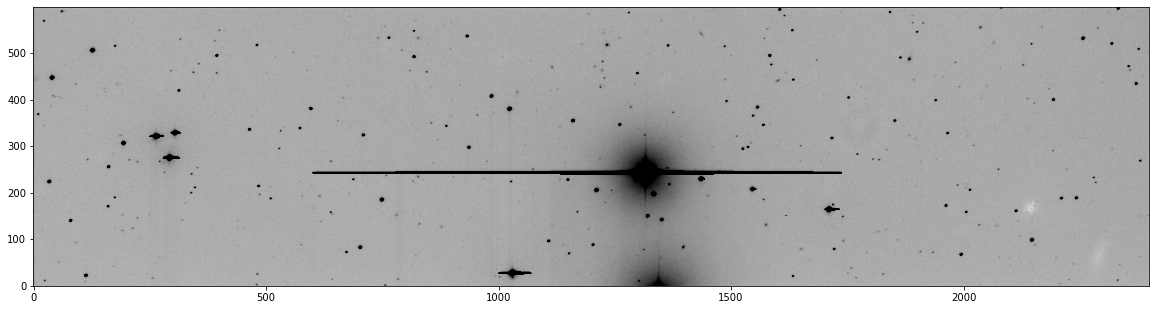

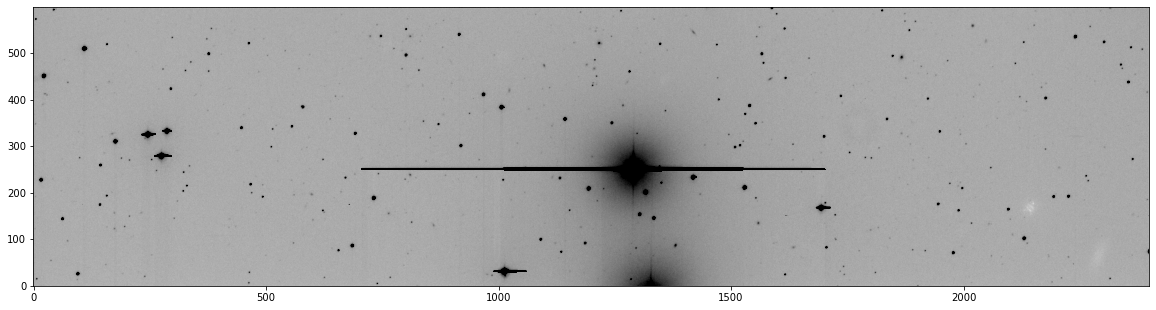

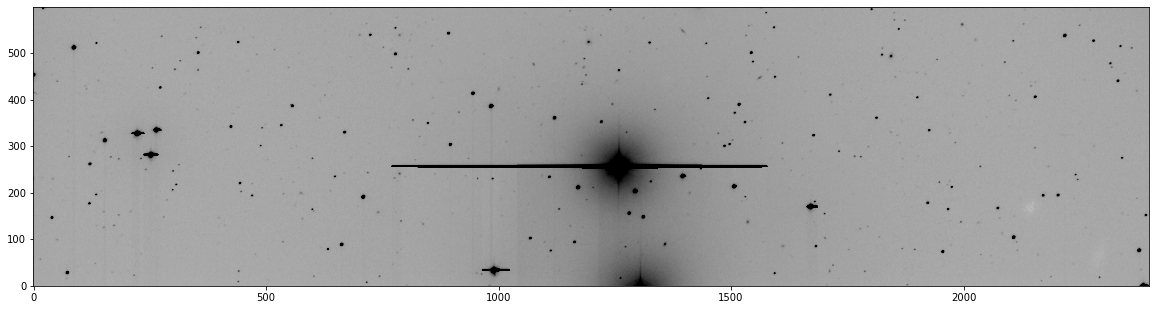

In [18]:
# Reduce the 3 science images
reduced_image1 = Reduce_Me('raw_sci1.fits',dark='dark.fits',flat='flatfield.fits').reduce()
reduced_image2 = Reduce_Me('raw_sci2.fits',dark='dark.fits',flat='flatfield.fits').reduce()
reduced_image3 = Reduce_Me('raw_sci3.fits',dark='dark.fits',flat='flatfield.fits').reduce()